# End to end multi-class Dog Breed Classification 

this notebook builds an end -to-end multi-class image classifier using tnesorFlow 2.0 and tensorFlow hub

## 1. Problem 

Identifying the breed of dog given an image of a dog. 

## 2. Data 
the data we're using is from kaggle's dog breed identificaion compeition 

https://www.kaggle.com/c/dog-breed-identification

## 3. Evaluation 

the evaluation is a file with prediction probabilities or each dog breed of each test image 
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features 
some information about the data:
* we're dealing with images (unstructured data) so it's prbably best  we use deep learning/transfer learning. 
* there are 120 breeds of dogs (this means there are 120 different classes)
* There are around 10,000+ images in the training set (these images have labels)
* There are around 10,000+ iages in the test set (no label, beacuese we are predicting them)

### Get our worksapce ready 

* Import TensorFlow 2.x
* Import TensorFlow hub 
* Make sure we're using a GPU

In [ ]:
# import necesary tools 
import tensorflow_hub as hub 
import tensorflow as tf 
print("TF version:", tf.__version__)
print("TF Hub  version:", hub.__version__)

#Check for GPU  availability 
print("GPU", "available (YESSS!!!)" if tf.config.list_physical_devices("GPU") else "not available")

TF version: 2.2.0
TF Hub  version: 0.8.0
GPU available (YESSS!!!)


In [ ]:
# getting upgrade steps 
# try:
 #%tensorflow_version #of verion 
 #except Exception:
   # pass

## Getting our data ready (turning it into tensors)

whith all machine learning models, our sta has to be in numerical format. we will turn the images inte tensor(num representation).

Lets start by accesing our data and checking out the labels 

In [ ]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/My Drive/Dog Vision/dog-breed-id/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())



                                      id               breed
count                              10222               10222
unique                             10222                 120
top     203a82da35da69a6517e0dce4d072071  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

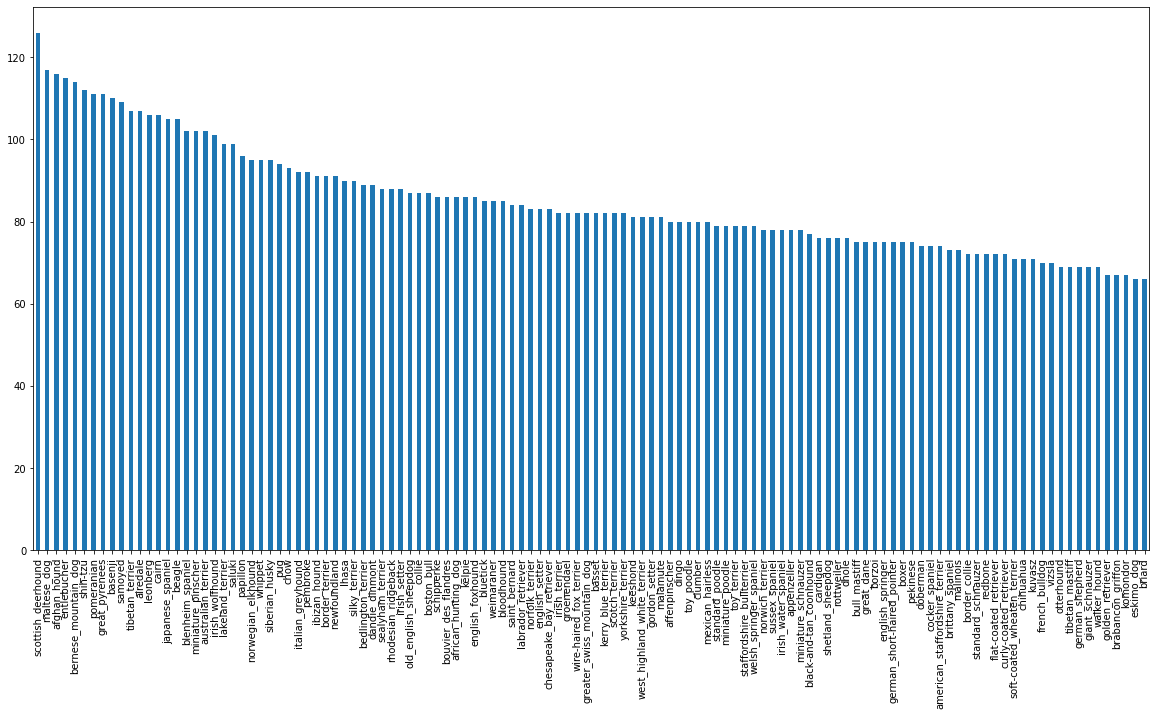

In [ ]:
# How many images are there of each bread 
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

#Google recomend at leat 10 images(best 100+) to train model
 

In [ ]:
# Let's view an image
from IPython.display import Image
# Image("/content/drive/My Drive/Dog Vision/dog-breed-id/train/001cdf01b096e06d78e9e5112d419397.jpg")



### Getting images and their labels
let's get a list of all of our image file pathnames

In [ ]:
# Create pathnames from image ID's
filenames = ["/content/drive/My Drive/Dog Vision/dog-breed-id/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]



['/content/drive/My Drive/Dog Vision/dog-breed-id/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# os.listdir('/content/drive/My Drive/Dog Vision/dog-breed-id/train/')[:10]

In [ ]:
# check whether number of filenames maches number of actual image files
import os
if len(os.listdir('/content/drive/My Drive/Dog Vision/dog-breed-id/train')) == len(filenames):
  print('filenames match actual amount of files! proceed.')
else:
    print('filenames do not match actual amount of files, check the target directory.')

filenames match actual amount of files! proceed.


In [ ]:
#One more check 
# Image(filenames[9000])


In [ ]:
labels_csv['breed'][9000]

'tibetan_mastiff'

Since we've got our training image filepaths in a list, lets prepare our labels 

In [ ]:
import numpy as np 
labels = labels_csv['breed'].to_numpy()

In [ ]:

# labels = np.array(labels)# does the same as cell above 
labels 

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories!")


Number of labels matches number of filenames!


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds


boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

### Creating our own validation set
since the dataset from kaggle doesnt come with a validation set we ned to crat our own.

In [ ]:
# Setup X & y variables
X = filenames
y = boolean_labels


In [ ]:
len(filenames)

10222

We're going to start experimenting with 1000 images and iccrease as needed



In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Let's have a geez at the training data
X_train[:5], y_train[:2]

(['/content/drive/My Drive/Dog Vision/dog-breed-id/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/My Drive/Dog Vision/dog-breed-id/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/My Drive/Dog Vision/dog-breed-id/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/My Drive/Dog Vision/dog-breed-id/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/My Drive/Dog Vision/dog-breed-id/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False,

## preprocessing images (turining images into Tensors)

to preprocess our images into tensors were going to write a function that does a few things:

1.   take an image filepath as input
2.   use tensorflow to read the file and save it to a variabe(image)
3. turn our image (jpg) into tensors

4. normalize the image convert values from 0-255 to 0-1 

5. resize the image to be a shape of (224, 224)
6. return the modified image 

before we do , let's see what importina an image looks like

In [ ]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [ ]:
# turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

now we've seen how an image looks like a tensor lets make a function to preprocess them 

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image


## Turning our data unto batches (not larger than 32)

whyturn our data into batches?

Lets say you're trying to process 10,000+ images in one go.... they all might not fit into memory.


so thats why we do about 32 images at the time.

in oreder to use TensorFlow effectively, we need our data in the form of tensor tuples which look like this (images, label)

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [ ]:
tf.constant(y[42])

<tf.Tensor: shape=(120,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])>

Now we've got a way to turn our data into touples of Tensors in the form: (image, label) let's make a fucntcion to turn all of our datat (X , y) into batches

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

    

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualiazing data batches 
our data is now in batches, however these can be hard to understand so lets visualize them using matplotlib 

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")



In [ ]:
#now lets visualize the data ina training batch 
# train_images, train_labels=next(train_data.as_numpy_iterator())
# show_25_images(train_images, train_labels)

In [ ]:
# now lets validate our validation set 
# val_images, val_labels = next(val_data.as_numpy_iterator())
# show_25_images(val_images, val_labels)

## Building a model
Before we build a model, there are a few things we need to define
* The input shape(our image shape in the form of tensors)
* The output shape( image labels in the form of tensors)
* The url of the model we want to use from TensorFlow Hub (https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4)

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"



Now we've got our inputs and outputs and model ready to go. let's put them together into a keras deep learning model!

let's create a function which:
* takes the input shape, output shape and the model we've chose as parameters.
* Definies the ;ayer in keras model in sequential fashion (do this first, then this then dat)
* complies the model( says it should be evaluated and improved)
* Builds the model (tells the model the input shape it'll be getting)
* returns the model.

all of this steps canbe found here: https://www.tensorflow.org/guide/keras/sequential_model?hl=sv


In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   multiple                  5432713   
_________________________________________________________________
dense_2 (Dense)              multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks 

callbacks a heplper functionts a model can use during training to do such things as as save its progress, checks its pogress or stop training early if a model stop improving

we'll create 2 callbacks, one for TensorBoard which helps track our model progress and another for early stoping which prevent our model from training for to long 



### TensorBoard callback 

To set up a TensorBoard callback, we needto do 3 thngs:
1. load TensorBoard callbacl notebook extension 
2. Create tensor board Callback which is abe to save logs to a directory and pass it to our molde' fit() function 
3. Vizualise our model trainig board with the %tensorboard magic function (we'll do this after model training)

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/My Drive/Dog Vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)




### Early stoping callback

Early stoping helps our model from overfitinfg by stopping trainig if  certain evaluation metrics stops improving.


https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of data)
our first model is only going to train o 1000 images, to make suere everything  is working.



In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
# Check to make sure we're still running on a GPU
print("GPU", "available (YESSS!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESSS!!!!!!)


let's create a function which trains a model.
* crete a model using `create model`
* set up a tensorboars callback using ` create_tensorboard_callback`
* call the `fit()` function on our model passing it training data, validation data, number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use
* return the model

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model




In [ ]:
#fit the model to the data 
model =  train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
 1/25 [>.............................] - ETA: 0s - loss: 5.5087 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

** Question ** It looks like our oedl is overfitting cause its performing way better on training dataset than on the validation dataset, what are the ways to prevent model overfitting in deep learning neutral networks

**NOte** overfitting to begin with is a good thing! it means our model is learning

### Checkihg the tensorboard logs 

The tensor board magiv functio `%tensorboard` will access the logs directory we created earlier and visualize its content 

In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

<IPython.core.display.Javascript object>

## king and evaluating predictions using  a trained model 

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

NameError: ignored

In [ ]:
predictions.shape

In [ ]:
len(y_val)

In [ ]:
len(unique_breeds)

In [ ]:
#predictions is an array of probabilities of each of the 120 breeds 
len(predictions[0])

In [ ]:
np.sum(predictions[0])

In [ ]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")


[4.95653891e-04 7.93970539e-05 5.31770602e-05 1.58190203e-04
 9.72199428e-04 5.26148506e-05 4.23226098e-04 1.46511314e-03
 3.25703211e-02 4.05197106e-02 5.43283240e-05 1.69167197e-05
 8.82829074e-04 1.39221838e-02 9.85878170e-04 1.77558251e-02
 5.36511070e-05 5.88466821e-04 4.09788539e-04 2.80536420e-04
 4.04603779e-05 6.56745862e-04 7.50819163e-05 1.15343246e-04
 3.53381447e-02 9.19629019e-05 1.79003735e-04 2.80559034e-04
 8.41751753e-04 3.98516022e-05 1.42714474e-04 1.79684444e-04
 4.94710803e-05 5.51699231e-05 8.47273914e-05 2.45186093e-04
 1.78721923e-04 1.81210169e-04 1.87483398e-04 1.66004196e-01
 5.66501345e-04 3.30170660e-05 7.19184522e-03 2.06735749e-05
 4.54970723e-04 1.43768804e-04 2.74099759e-04 2.38989131e-03
 4.50787848e-05 1.29485130e-03 2.63331429e-04 3.56373901e-04
 9.38181707e-04 2.24739476e-03 1.94021894e-04 6.33456977e-04
 1.11136667e-03 1.04740560e-04 6.40235085e-05 4.81001080e-05
 7.69118560e-05 6.90604094e-04 9.12941050e-06 5.05811186e-05
 1.05441606e-04 2.490700

In [ ]:
unique_breeds[113]

'walker_hound'

Having the above functionallity its great but we want to be able to do it at scale. It would be even better if we could see the image the prediction is being made on on!


**Note** prediction probabilitees also known as confidecne levels 

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

NameError: ignored

since our validation data is still in batch dataset, we have to unbatch it to make predictions on a validation images and then compare this prediction to valdation labels(truth labels)

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

now we've got ways to get:
* Predictions labels
* Validation labels 
* validation images 

lets' make some functions to make these all a bit more visual 
we'll crate a function which:
* Takes an array of prediction probabilities, an array of truth labels an array of images and integer.
* convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and the target image in a singel plot

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)


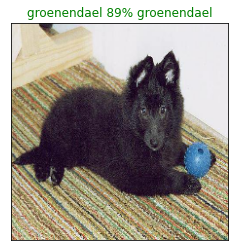

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

Now we've got one function to visualize our moels top prediction, lets make another to view our models top 10 predictions 

this function will:

* Take an input of prediction probabilities array and a ground truth array and an integer 
* Find the prediction usinug `get_pred_label()`
* Find the top 10:
  * Prediction probabilities indexes 
  * Prediction probabilities values 
  * Prediction labels 
* plot the top 10 prediction probability values and labels, coloring the true label grenn


In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n = 1):
  """
  plot the top 10 highest prediction confidences along with the truth label for ample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n], 

  #Get the predicted label 

  pred_label = get_pred_label(pred_prob)

  #Find the top 10 prediction confidence indexes 
  top_10_pred_idexes = pred_prob.argsort()[-10:][::-1]

  #find the top 10 prediction confidence values 
  top_10_pred_values = pred_prob[top_10_pred_idexes]

  #find the top 10 ppredictions labels 

  top_10_pred_labels = unique_breeds[top_10_pred_idexes]

  #Set up plot 

  top_plot = plt.bar(np.arange (len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="gray")
  
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = "vertical")
  
  #Change the color of the true label 

  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass



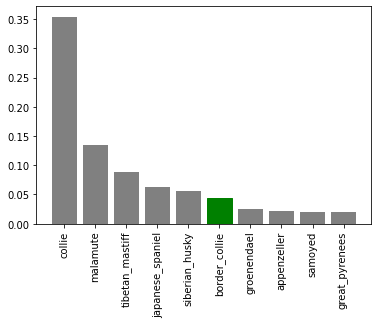

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we've got some functions to help us visualize our functions and evaluate our model

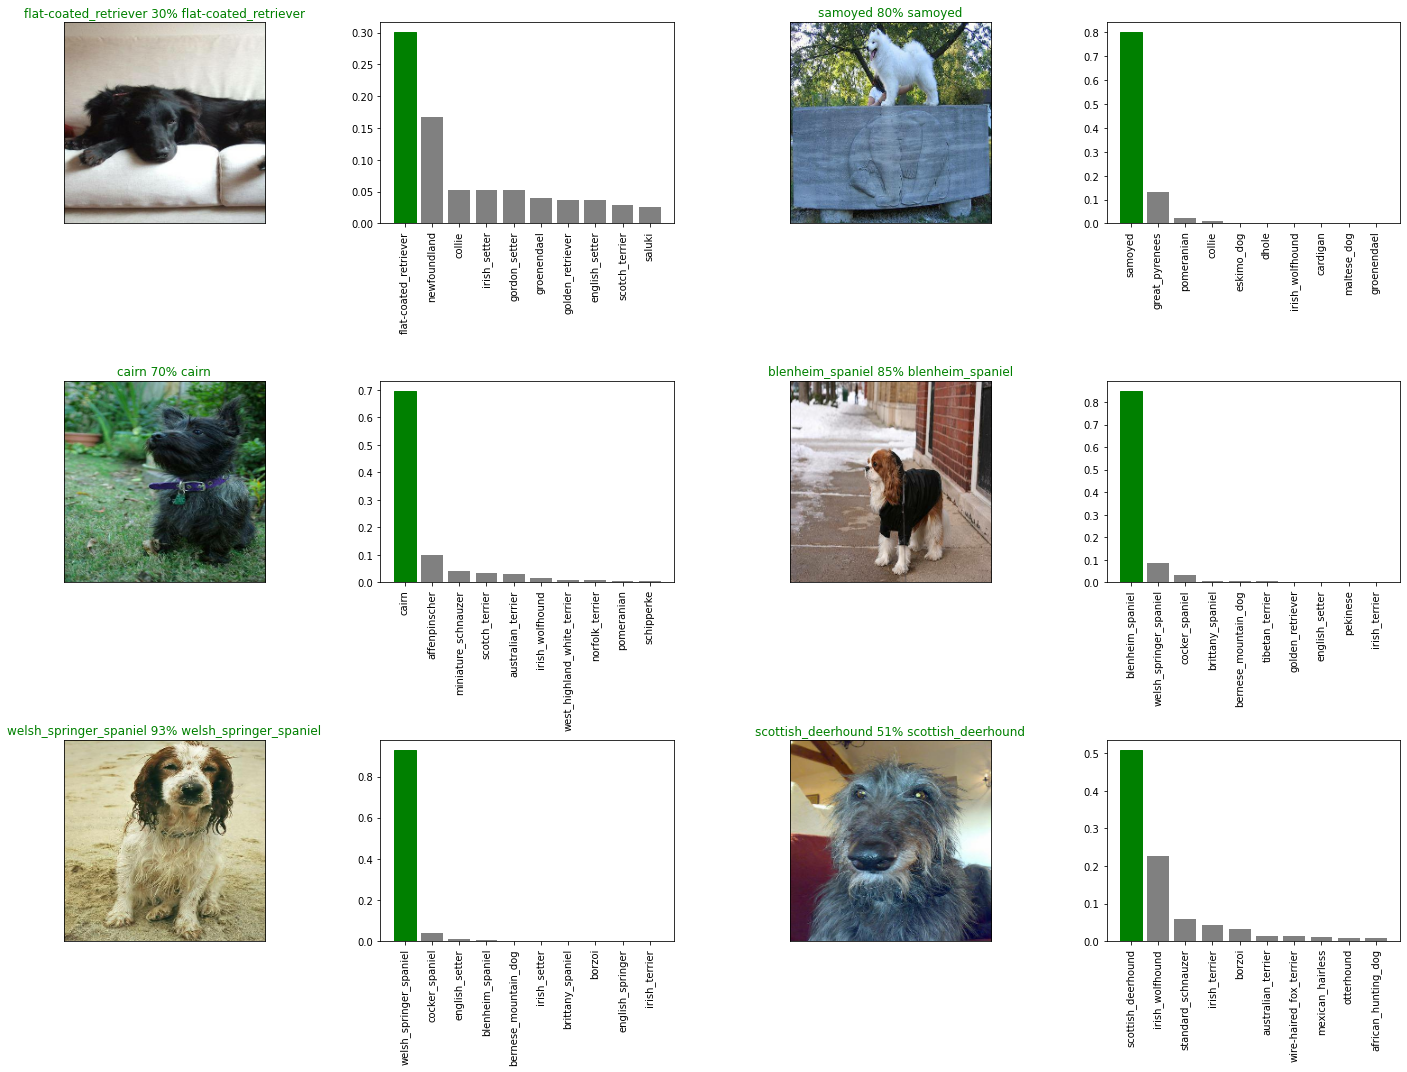

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images =  num_rows * num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

** challange how would yu create a confusion matrix with our models predictions and a true label?

## Saving and reload the model 

In [ ]:
# Create a function to savea model 
def save_model(model, suffix = None):
  """
  Save a given model in a models directory and appends a suffix(string)
  """

  #Create a model directory pathname with current time 
  modeldir = os.path.join("/content/drive/My Drive/Dog Vision/Models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "_" + suffix + ".h5"  #save format of model 

  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a treined model 

def load_model(model_path):
  """

  Loads a saved model from a specified path
  """
  print(f"Loading model: {model_path}...")

  model = tf.keras.models.load_model(model_path,
                                    custom_objects={"KerasLayer":hub.KerasLayer})
  
  return model 

now we've got functions to save and load a trainded model, lets make sure they work!

In [ ]:
#Save our model trained no a 1000 images 

save_model(model, suffix = "1000-images-mobilenetv2-Adam")

Saving model to: /content/drive/My Drive/Dog Vision/Models/20200802-09371596361061_1000-images-mobilenetv2-Adam.h5...


'/content/drive/My Drive/Dog Vision/Models/20200802-09371596361061_1000-images-mobilenetv2-Adam.h5'

In [ ]:
#Load a trained model 

loaded_1000_image_model = load_model('/content/drive/My Drive/Dog Vision/Models/20200802-09371596361061_1000-images-mobilenetv2-Adam.h5')

NameError: ignored

In [ ]:
# Evaluate the pre saved model 
model.evaluate(val_data)

7/7 [==============================] - 1s 102ms/step - loss: 1.3356 - accuracy: 0.6300


[1.335602879524231, 0.6299999952316284]

In [ ]:
#Evaluate the loaded model 
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 103ms/step - loss: 1.3356 - accuracy: 0.6300


[1.335602879524231, 0.6299999952316284]

## Training a big dog model (on the full data)


In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
X[:10]

['/content/drive/My Drive/Dog Vision/dog-breed-id/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
X_train[:10]

['/content/drive/My Drive/Dog Vision/dog-breed-id/train/00bee065dcec471f26394855c5c2f3de.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/0ea5759640f2e1c2d1a06adaf8a54ca7.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/03e1d2ee5fd90aef036c90a9e7f81177.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/16941a6728ddb9cb7423a6cc97fbe071.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/0bedbecd92390ef9f4f7c8b06a629340.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/train/143b9484273e57668d03bfc26755810a.jpg']

In [ ]:
len(X_train)

800

In [ ]:
# Create a data batch with the full dataset
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Create a model for full model 
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# no validation set when training on all the data, so we can't monitor validation accuraccy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience = 3)

In [ ]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])



Epoch 1/100
320/320 [==============================] - 3976s 12s/step - loss: 1.3665 - accuracy: 0.6656
Epoch 2/100
320/320 [==============================] - 48s 150ms/step - loss: 0.4025 - accuracy: 0.8839
Epoch 3/100
320/320 [==============================] - 47s 148ms/step - loss: 0.2373 - accuracy: 0.9366
Epoch 4/100
320/320 [==============================] - 47s 148ms/step - loss: 0.1545 - accuracy: 0.9630
Epoch 5/100
320/320 [==============================] - 47s 147ms/step - loss: 0.1072 - accuracy: 0.9778
Epoch 6/100
320/320 [==============================] - 47s 147ms/step - loss: 0.0769 - accuracy: 0.9866
Epoch 7/100
320/320 [==============================] - 47s 148ms/step - loss: 0.0591 - accuracy: 0.9906
Epoch 8/100
320/320 [==============================] - 48s 151ms/step - loss: 0.0478 - accuracy: 0.9941
Epoch 9/100
320/320 [==============================] - 47s 148ms/step - loss: 0.0371 - accuracy: 0.9962
Epoch 10/100
320/320 [==============================] - 47s 148m

In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: /content/drive/My Drive/Dog Vision/Models/20200802-11151596366922_full-image-set-mobilenetv2-Adam.h5...


'/content/drive/My Drive/Dog Vision/Models/20200802-11151596366922_full-image-set-mobilenetv2-Adam.h5'

In [ ]:
#loading the full model
loaded_full_model = load_model('/content/drive/My Drive/Dog Vision/Models/20200802-11151596366922_full-image-set-mobilenetv2-Adam.h5')

Loading model: /content/drive/My Drive/Dog Vision/Models/20200802-11151596366922_full-image-set-mobilenetv2-Adam.h5...


## Making predictions on the data set 

Since our model has been trained on images in the form of tensor btches, tomake predictions on the test data, we,ll have to get it into the same fromat. 

Luckily we create `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches 

To mak predictions on the test data, we'll:
*Get the test image filename 
* Convert the filenmaes into tst data batches using
`create_data_batches()` and setting the `test_data` parameteres to `true`(since the etst data doenst have labels)
*Make a predictions array by passing the test batches to the `predict()` method called on our model 

In [ ]:
#Loadtest image filename 
test_path = "/content/drive/My Drive/Dog Vision/dog-breed-id/test/"
test_filename = [ test_path +fname for fname in os.listdir(test_path)]
test_filename[:10]

['/content/drive/My Drive/Dog Vision/dog-breed-id/test/f599f4d08388e69960e17234ebd0beba.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/test/f56b3708592637432ac53d7f0684dfa8.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/test/f586cdd98e69c6909b8048d728937ab9.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/test/f532b476d5d46f4ba89b22449e3c147d.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/test/f53aa47b4676b1f135ac2eeeee01db9b.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/test/f574f558d78db4e616e91f5dd5347409.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/test/f58a21665136bb6aa4aa90c485be4315.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/test/f58ce44146db339a0bba50bcecb02730.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/test/f575720280425098d6faca42cff69a36.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/test/f58b1ce36c59e42dd22be92949fc38a7.jpg']

In [ ]:
len(test_filename)

In [ ]:
#Create test data batch
test_data = create_data_batches(test_filename, test_data= True)

Creating test data batches...


In [ ]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

**Note** Calling `predict()` on our full model and pass it the test data batch will take a long time to run(about an hour)

In [ ]:
#Make predictions on test data batch using the loaded full model 

test_predictions = loaded_full_model.predict(test_data,
                                             verbose = 1 )

324/324 [==============================] - 8095s 25s/step


In [ ]:
#Save predictions(Numpy array) to csv file (for access later)
np.savetxt("/content/drive/My Drive/Dog Vision/dog-breed-id/preds_array.csv", test_predictions, delimiter=",")

In [ ]:
#Load predictions 
test_predictions = np.loadtxt("/content/drive/My Drive/Dog Vision/dog-breed-id/preds_array.csv", delimiter = ",")


In [ ]:
test_predictions[:10]

array([[1.66595754e-07, 5.51341657e-08, 1.58456848e-09, ...,
        6.83312606e-08, 1.32958812e-04, 4.26638471e-05],
       [1.09658281e-11, 6.01811396e-12, 2.31556746e-10, ...,
        7.94995417e-13, 3.64553179e-11, 1.15884091e-11],
       [4.38478073e-12, 1.11969996e-10, 7.85877335e-11, ...,
        5.37561903e-07, 5.84746509e-08, 5.87925375e-10],
       ...,
       [1.57855354e-10, 1.16078691e-09, 1.97165995e-09, ...,
        5.78650179e-06, 2.00044304e-11, 9.21639376e-10],
       [5.24735012e-11, 3.70419895e-13, 3.05193787e-11, ...,
        1.62139156e-11, 3.31040299e-11, 7.03120691e-07],
       [2.57707143e-06, 1.25342160e-06, 1.30568107e-08, ...,
        1.88251158e-06, 6.75998817e-05, 2.78620777e-04]])

In [ ]:
test_predictions.shape

(10360, 120)

## Preparing test dataset predictions for kaggle 

Looking at the kaggle sample submision, we find it wants our models prediction probabilty outputs in a DataFrame with an id and a column for each different dog breed

To get the data in this format we'll:
* create a panda DataFrame with an ID column as well as a column fro each dog breed 
* Add data (the prediction probavilities) to each of the dog breed columns 
* Export the DataFrame as csv to submit it to kaggle

In [ ]:
#Create a pandas data frame 

import pandas as pd 

preds_df = pd.DataFrame(columns =["id"]+ list(unique_breeds))
preds_df.head()


Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
#Apend test image ID to predictions DataFrame 

test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"]= test_ids
preds_df.head()

id  ... yorkshire_terrier
0  f599f4d08388e69960e17234ebd0beba  ...               NaN
1  f56b3708592637432ac53d7f0684dfa8  ...               NaN
2  f586cdd98e69c6909b8048d728937ab9  ...               NaN
3  f532b476d5d46f4ba89b22449e3c147d  ...               NaN
4  f53aa47b4676b1f135ac2eeeee01db9b  ...               NaN

[5 rows x 121 columns]

In [ ]:
#Add the predicton probabilities to each dog breed column 
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  ... yorkshire_terrier
0  f599f4d08388e69960e17234ebd0beba  ...       4.26638e-05
1  f56b3708592637432ac53d7f0684dfa8  ...       1.15884e-11
2  f586cdd98e69c6909b8048d728937ab9  ...       5.87925e-10
3  f532b476d5d46f4ba89b22449e3c147d  ...       1.61833e-11
4  f53aa47b4676b1f135ac2eeeee01db9b  ...        5.4667e-08

[5 rows x 121 columns]

In [ ]:
#Save our predictions dataframe to csv for submision to kaggle 
preds_df.to_csv("/content/drive/My Drive/Dog Vision/dog-breed-id/full_model_prediction_submision_1_mobilnetv2.csv",
                index = False)

## Making predictions on costume images 

To make predictions on costum images, we'll:
* get the file paths 
* turn the file paths into data batches using `cretate_data_batches` parameters to `True`. 
* pass the costume image data batch to our model's `predict()` method.
* Compare the predicted labels to the custom images  

In [ ]:
# get the costume image filepath 

costume_path = "/content/drive/My Drive/Dog Vision/dog-breed-id/my-dog-fotos/"
costume_image_paths = [costume_path + fname for fname in os.listdir(costume_path)]


In [ ]:
costume_image_paths

['/content/drive/My Drive/Dog Vision/dog-breed-id/my-dog-fotos/dog3.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/my-dog-fotos/dog2.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/my-dog-fotos/dog1.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/my-dog-fotos/dog6.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/my-dog-fotos/dog5.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-id/my-dog-fotos/dog4.jpg']

In [ ]:
# turn custome images into batch data set 

costume_data = create_data_batches(costume_image_paths, test_data = True)
costume_data

Creating test data batches...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
#Make predictions on the custome data 
custom_preds = loaded_full_model.predict(costume_data)

In [ ]:
custom_preds.shape

(6, 120)

In [ ]:
#Get custome image prediction labels 
custom_preds_labels= [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]

In [ ]:
custom_preds_labels

['staffordshire_bullterrier',
 'pomeranian',
 'vizsla',
 'pug',
 'eskimo_dog',
 'german_shepherd']

In [ ]:
#Get the custome images 
custome_images =[]
#loop through unbatched data 
for image in costume_data.unbatch().as_numpy_iterator():
  custome_images.append(image)

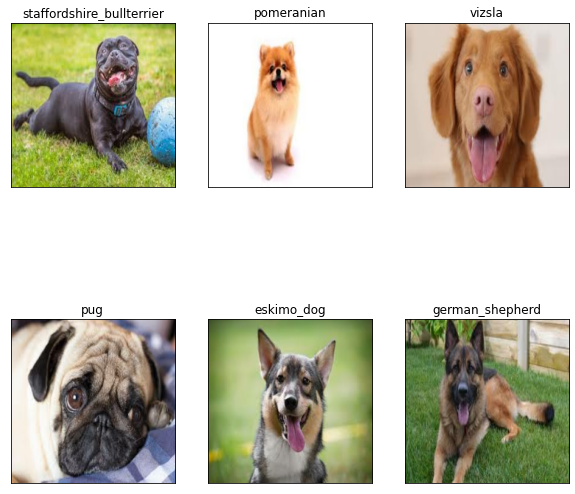

In [ ]:
#chek custome prdictions 
plt.figure(figsize =(10,10))
for i, image in enumerate(custome_images):
  plt.subplot(2, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_preds_labels[i])
  plt.imshow(image)
